# Import

In [1]:
# Basic
import pandas as pd
import numpy as np
import warnings

warnings.simplefilter('ignore')

# ML Toolkit
from robusta.selector import *
from robusta.crossval import *
from robusta.pipeline import *
from robusta.preprocessing import *

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import *

# Model
from sklearn.linear_model import Ridge

# Plot
from jupyterthemes import jtplot
import matplotlib

jtplot.style('gruvboxd')
matplotlib.use('nbagg')

Using TensorFlow backend.


# Data

In [2]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=100, n_features=20, n_informative=5, 
                       random_state=666)

X = pd.DataFrame(X)
y = pd.Series(y)

X.rename(columns=lambda x: 'x{}'.format(x), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
y

0      26.101745
1     -42.616486
2     -46.321013
3     100.987270
4      29.119044
         ...    
95    215.936404
96    272.505488
97     -9.940659
98    127.823394
99     48.658169
Length: 100, dtype: float64

# Task & Model

In [4]:
get_score = lambda y_true, y_pred: -mean_squared_error(y_true, y_pred)
scoring = 'neg_mean_squared_error'

cv = 5

model = Ridge()

# Baseline

In [5]:
subset = X_train.columns

_, y_pred = crossval_predict(model, cv, X_train[subset], y_train, X_new=X_test[subset],
                             scoring=scoring, verbose=2, n_jobs=None)

get_score(y_test, y_pred)

[01:01:03]  Ridge

[01:01:03]  VAL 1:   -10.6182
[01:01:03]  VAL 2:   -9.8554
[01:01:03]  VAL 3:   -16.4120
[01:01:04]  VAL 4:   -10.9550
[01:01:04]  VAL 5:   -9.6408

[01:01:04]  VALID:   -11.4963 ± 2.5046



-6.335238549093478

# Selector

## Greed Selector

### Forward

In [6]:
selector = GreedSelector(model, cv, scoring, n_jobs=-1, 
                         floating=True, forward=True)
selector.fit(X_train, y_train)

[01:01:04] STEP FORWARD
[01:01:04] ITER: 1      SUBSET: 1/20      SCORE: -15423.4606 ± 2487.3005      
[01:01:04] ITER: 2      SUBSET: 1/20      SCORE: -11966.5937 ± 3856.4568      
[01:01:04] ITER: 3      SUBSET: 1/20      SCORE: -17221.5335 ± 2437.5846      
[01:01:04] ITER: 4      SUBSET: 1/20      SCORE: -17927.9456 ± 2640.4561      
[01:01:04] ITER: 5      SUBSET: 1/20      SCORE: -17802.6724 ± 2678.0470      
[01:01:05] ITER: 6      SUBSET: 1/20      SCORE: -14085.8542 ± 3898.4301      
[01:01:05] ITER: 7      SUBSET: 1/20      SCORE: -17919.1728 ± 1842.0015      
[01:01:05] ITER: 8      SUBSET: 1/20      SCORE: -18236.0320 ± 2644.1336      
[01:01:05] ITER: 9      SUBSET: 1/20      SCORE: -18105.5768 ± 2552.8666      
[01:01:05] ITER: 10      SUBSET: 1/20      SCORE: -18486.1272 ± 3048.4337      
[01:01:05] ITER: 11      SUBSET: 1/20      SCORE: -18088.7605 ± 1918.3160      
[01:01:05] ITER: 12      SUBSET: 1/20      SCORE: -18419.9875 ± 3152.5197      
[01:01:05] ITER: 13      

[01:01:16] ITER: 101      SUBSET: 6/20      SCORE: -5.9491 ± 1.9290      
[01:01:16] ITER: 102      SUBSET: 6/20      SCORE: -5.7537 ± 1.8234      
[01:01:16] ITER: 103      SUBSET: 6/20      SCORE: -5.8512 ± 1.4963      
[01:01:17] ITER: 104      SUBSET: 6/20      SCORE: -6.0175 ± 2.0665      
[01:01:17] ITER: 105      SUBSET: 6/20      SCORE: -5.7368 ± 1.7936      
[01:01:17] ITER: 106      SUBSET: 6/20      SCORE: -5.8406 ± 1.9454      
[01:01:17] ITER: 107      SUBSET: 6/20      SCORE: -5.8310 ± 1.8558      
[01:01:17] ITER: 108      SUBSET: 6/20      SCORE: -5.8816 ± 1.9189      
[01:01:17] ITER: 109      SUBSET: 6/20      SCORE: -5.6779 ± 1.7728      
[01:01:17] ITER: 110      SUBSET: 6/20      SCORE: -5.7418 ± 1.8186      
[01:01:17] ITER: 111      SUBSET: 6/20      SCORE: -6.2536 ± 1.3971      
[01:01:17] STEP BACKWARD
[01:01:18] ITER: 112      SUBSET: 5/20      SCORE: -2751.0612 ± 641.8732      
[01:01:18] ITER: 113      SUBSET: 5/20      SCORE: -7800.0619 ± 1807.0568      
[0

[01:01:29] ITER: 207      SUBSET: 10/20      SCORE: -6.5944 ± 1.1837      


GreedSelector(cv=5,
              estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                              max_iter=None, normalize=False, random_state=None,
                              solver='auto', tol=0.001),
              floating=True, forward=True, k_features=0.5, max_time=None,
              n_digits=4, n_jobs=-1, random_state=0,
              scoring='neg_mean_squared_error', use_best=True, verbose=1)

In [7]:
subset = selector.get_subset()

_, y_pred = crossval_predict(model, cv, X_train[subset], y_train, 
                             X_new=X_test[subset], scoring=scoring, 
                             verbose=2, n_jobs=None)

get_score(y_test, y_pred)

[01:01:29]  Ridge

[01:01:29]  VAL 1:   -3.6862
[01:01:29]  VAL 2:   -5.9441
[01:01:29]  VAL 3:   -6.1361
[01:01:30]  VAL 4:   -8.5455
[01:01:30]  VAL 5:   -3.6770

[01:01:30]  VALID:   -5.5978 ± 1.8134



-2.1132813922102676

<IPython.core.display.Javascript object>


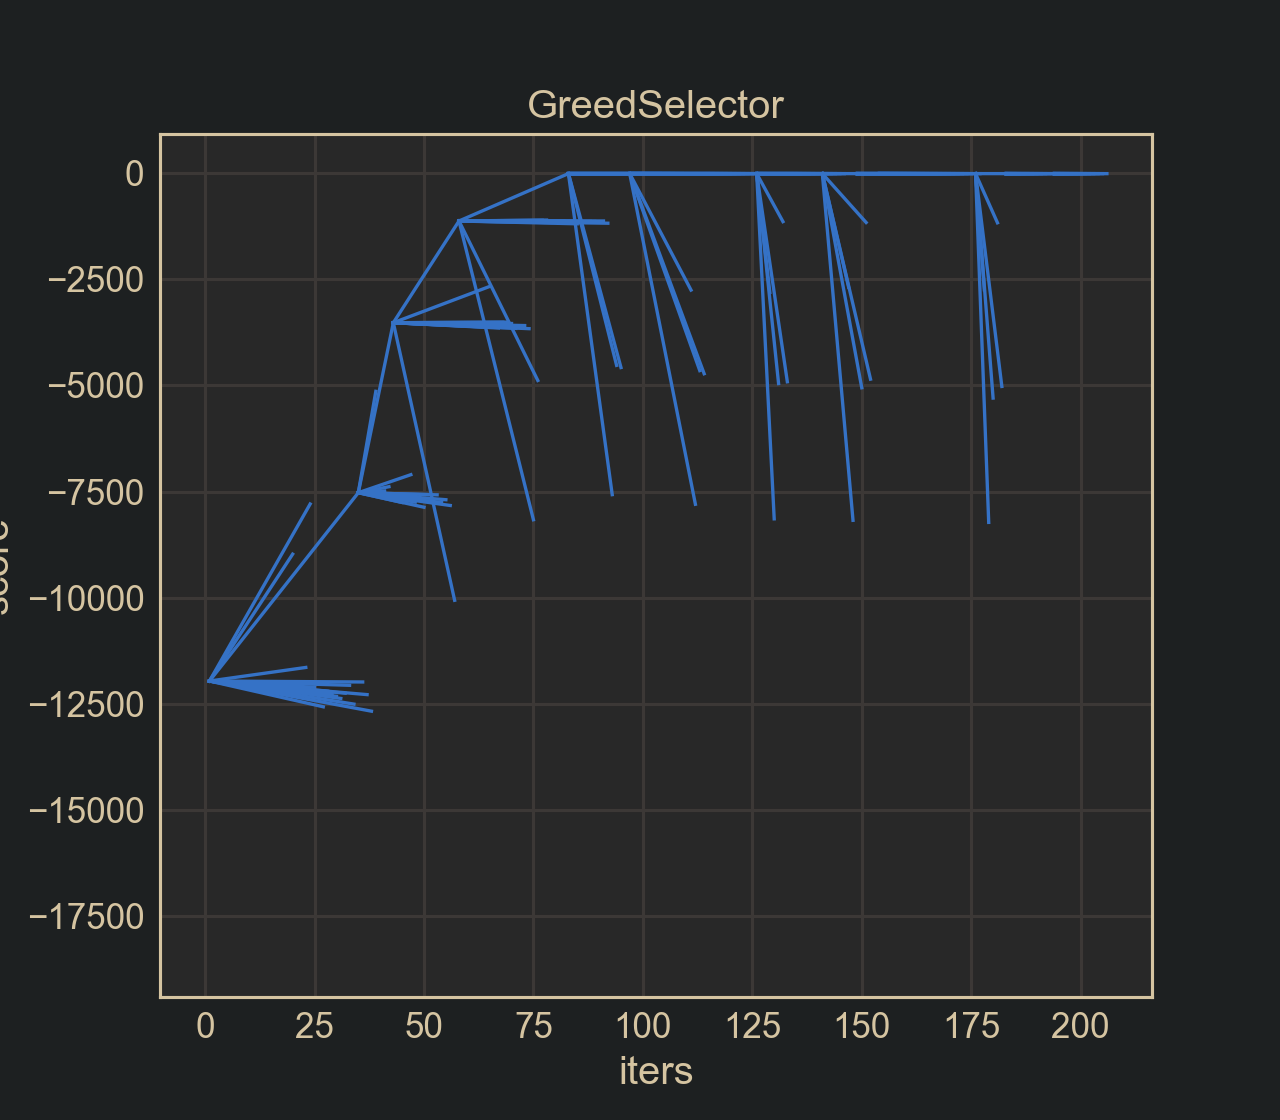

(<Figure size 640x560 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13a7310b8>)

In [8]:
%matplotlib notebook

selector.plot_progress(color='b')

### Backward

In [9]:
selector = GreedSelector(model, cv, scoring, n_jobs=-1, 
                         floating=True, forward=False)
selector.fit(X_train, y_train)

[01:01:38] ITER: 1      SUBSET: 20/20      SCORE: -11.4963 ± 2.5046      
[01:01:38] STEP BACKWARD
[01:01:38] ITER: 2      SUBSET: 19/20      SCORE: -3738.1649 ± 834.1974      
[01:01:38] ITER: 3      SUBSET: 19/20      SCORE: -8381.2108 ± 2311.3971      
[01:01:38] ITER: 4      SUBSET: 19/20      SCORE: -9.8384 ± 1.0941      
[01:01:39] ITER: 5      SUBSET: 19/20      SCORE: -10.6292 ± 1.5219      
[01:01:39] ITER: 6      SUBSET: 19/20      SCORE: -11.3065 ± 2.4827      
[01:01:39] ITER: 7      SUBSET: 19/20      SCORE: -6682.6480 ± 2328.4072      
[01:01:39] ITER: 8      SUBSET: 19/20      SCORE: -11.1135 ± 3.0098      
[01:01:39] ITER: 9      SUBSET: 19/20      SCORE: -10.9663 ± 2.6011      
[01:01:39] ITER: 10      SUBSET: 19/20      SCORE: -11.0371 ± 2.4417      
[01:01:39] ITER: 11      SUBSET: 19/20      SCORE: -1317.8115 ± 530.4071      
[01:01:39] ITER: 12      SUBSET: 19/20      SCORE: -11.3246 ± 2.6201      
[01:01:39] ITER: 13      SUBSET: 19/20      SCORE: -9.7431 ± 1.1944

[01:01:51] ITER: 105      SUBSET: 14/20      SCORE: -1225.1218 ± 508.5222      
[01:01:51] ITER: 106      SUBSET: 14/20      SCORE: -7.0922 ± 1.8639      
[01:01:51] ITER: 107      SUBSET: 14/20      SCORE: -7.3159 ± 1.7208      
[01:01:51] ITER: 108      SUBSET: 14/20      SCORE: -7.0607 ± 1.4285      
[01:01:51] ITER: 109      SUBSET: 14/20      SCORE: -7.1356 ± 1.6353      
[01:01:51] ITER: 110      SUBSET: 14/20      SCORE: -5614.0981 ± 649.3836      
[01:01:51] ITER: 111      SUBSET: 14/20      SCORE: -7.3017 ± 1.6431      
[01:01:52] ITER: 112      SUBSET: 14/20      SCORE: -7.0168 ± 1.7148      
[01:01:52] STEP FORWARD
[01:01:52] ITER: 113      SUBSET: 15/20      SCORE: -7.6060 ± 2.0297      
[01:01:52] ITER: 114      SUBSET: 15/20      SCORE: -7.5124 ± 1.7456      
[01:01:52] ITER: 115      SUBSET: 15/20      SCORE: -7.4911 ± 1.7899      
[01:01:52] ITER: 116      SUBSET: 15/20      SCORE: -7.6478 ± 1.2148      
[01:01:52] STEP BACKWARD
[01:01:52] ITER: 117      SUBSET: 13/20  

GreedSelector(cv=5,
              estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                              max_iter=None, normalize=False, random_state=None,
                              solver='auto', tol=0.001),
              floating=True, forward=False, k_features=0.5, max_time=None,
              n_digits=4, n_jobs=-1, random_state=0,
              scoring='neg_mean_squared_error', use_best=True, verbose=1)

In [10]:
subset = selector.get_subset()

_, y_pred = crossval_predict(model, cv, X_train[subset], y_train, 
                             X_new=X_test[subset], scoring=scoring, 
                             verbose=2, n_jobs=None)

get_score(y_test, y_pred)

[01:02:00]  Ridge

[01:02:00]  VAL 1:   -3.6880
[01:02:01]  VAL 2:   -7.8932
[01:02:01]  VAL 3:   -6.6144
[01:02:01]  VAL 4:   -8.3922
[01:02:01]  VAL 5:   -4.0275

[01:02:01]  VALID:   -6.1231 ± 1.9414



-2.189203087952817

<IPython.core.display.Javascript object>


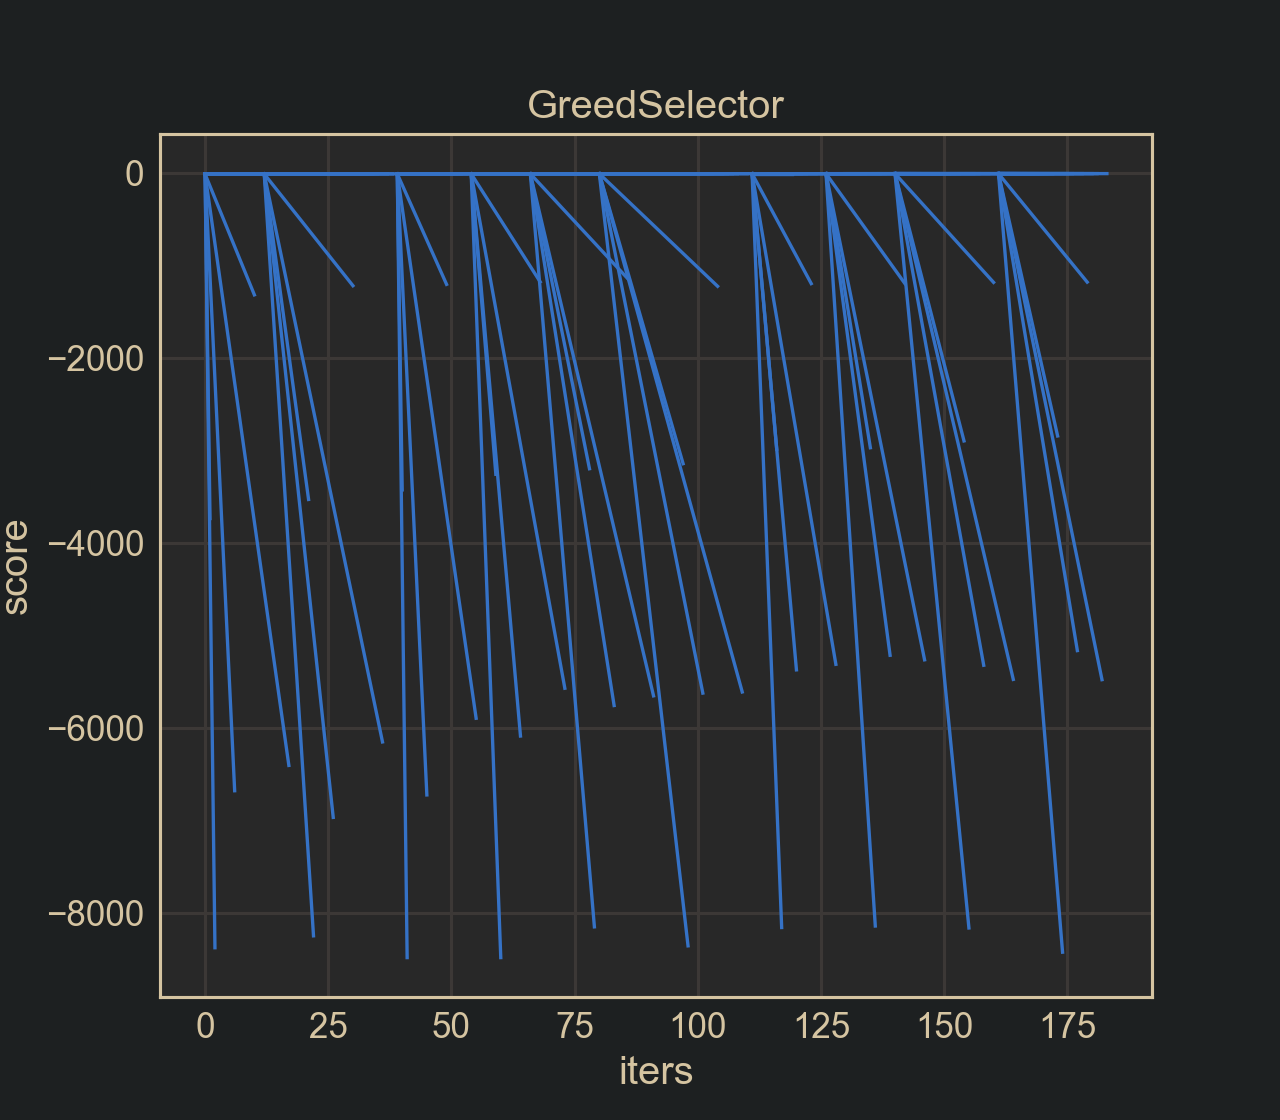

(<Figure size 640x560 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11a008c50>)

In [11]:
%matplotlib notebook

selector.plot_progress(color='b')

## RFE

In [17]:
selector = RFE(model, cv, scoring, min_features=5, n_jobs=-1)
selector.fit(X_train, y_train)

[01:02:46] ITER: 1/16      SUBSET: 20/20      SCORE: -11.4963 ± 2.5046      ETA: 1 sec
[01:02:46] ITER: 2/16      SUBSET: 19/20      SCORE: -11.3298 ± 2.5745      ETA: 1 sec
[01:02:46] ITER: 3/16      SUBSET: 18/20      SCORE: -11.1471 ± 2.5360      ETA: 1 sec
[01:02:46] ITER: 4/16      SUBSET: 17/20      SCORE: -10.8938 ± 2.3695      ETA: 1 sec
[01:02:46] ITER: 5/16      SUBSET: 16/20      SCORE: -10.4710 ± 2.3776      ETA: 1 sec
[01:02:47] ITER: 6/16      SUBSET: 15/20      SCORE: -10.2552 ± 2.6375      ETA: 1 sec
[01:02:47] ITER: 7/16      SUBSET: 14/20      SCORE: -9.6688 ± 1.8497      ETA: 979 ms
[01:02:47] ITER: 8/16      SUBSET: 13/20      SCORE: -9.0537 ± 1.4190      ETA: 870 ms
[01:02:47] ITER: 9/16      SUBSET: 12/20      SCORE: -8.8250 ± 1.6465      ETA: 762 ms
[01:02:47] ITER: 10/16      SUBSET: 11/20      SCORE: -8.4418 ± 1.6496      ETA: 653 ms
[01:02:47] ITER: 11/16      SUBSET: 10/20      SCORE: -8.1332 ± 1.9962      ETA: 544 ms
[01:02:47] ITER: 12/16      SUBSET: 9/20 

RFE(cv=5,
    estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
                    normalize=False, random_state=None, solver='auto',
                    tol=0.001),
    min_features=5, n_digits=4, n_jobs=-1, scoring='neg_mean_squared_error',
    step=1, use_best=True, verbose=1)

In [18]:
subset = selector.get_subset()

_, y_pred = crossval_predict(model, cv, X_train[subset], y_train, 
                             X_new=X_test[subset], scoring=scoring, 
                             verbose=2, n_jobs=None)

get_score(y_test, y_pred)

[01:02:48]  Ridge

[01:02:48]  VAL 1:   -3.6862
[01:02:48]  VAL 2:   -5.9441
[01:02:48]  VAL 3:   -6.1361
[01:02:48]  VAL 4:   -8.5455
[01:02:48]  VAL 5:   -3.6770

[01:02:48]  VALID:   -5.5978 ± 1.8134



-2.1132813922102676

<IPython.core.display.Javascript object>


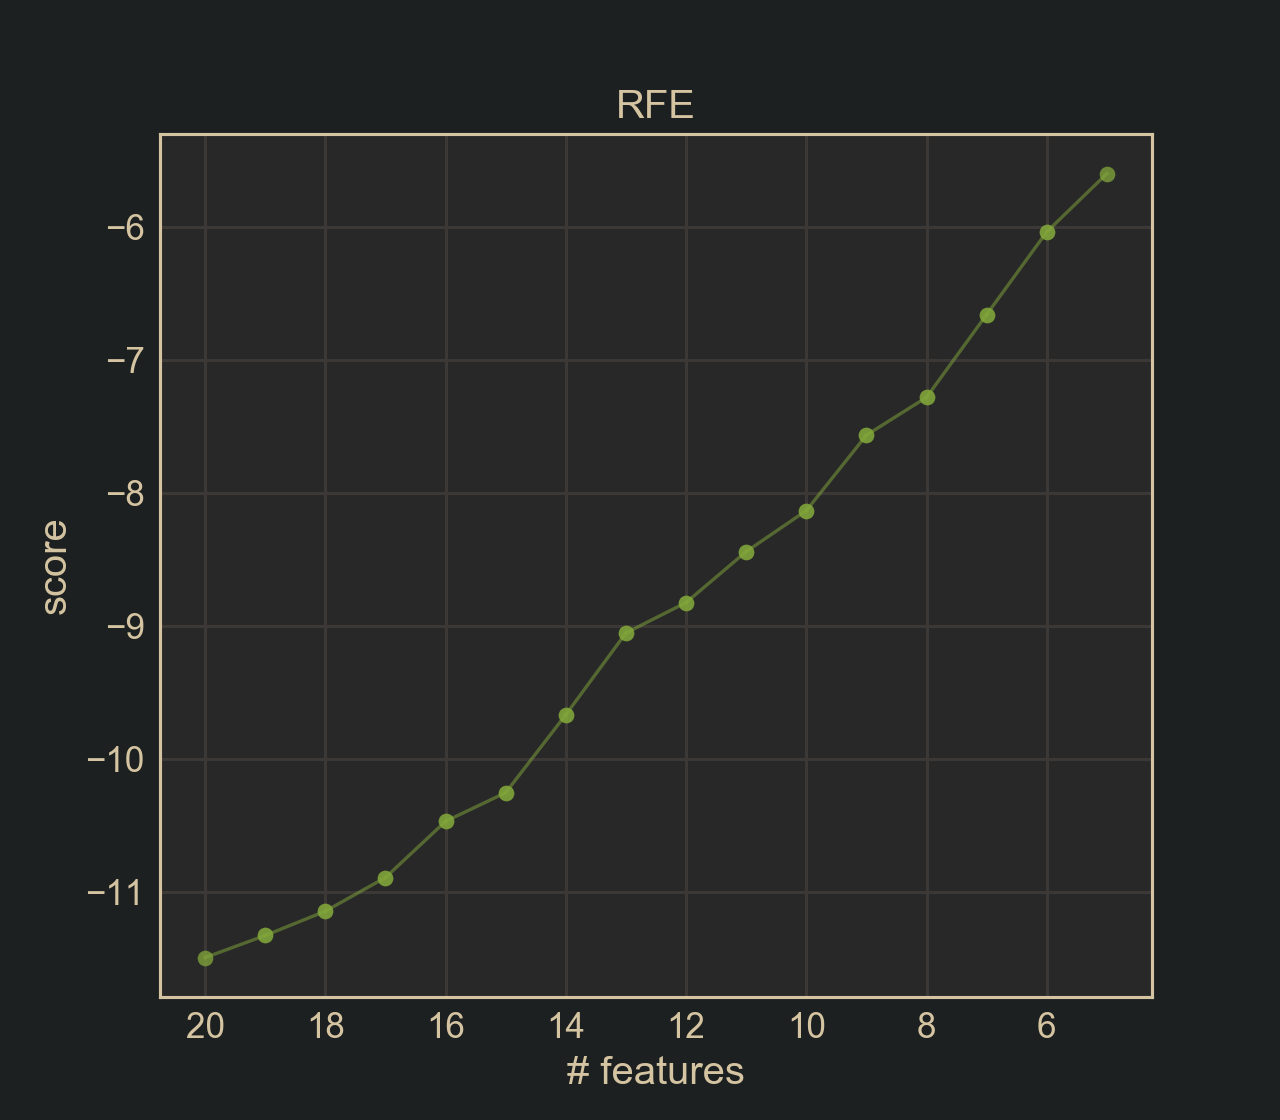

(<Figure size 640x560 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13c6506a0>)

In [19]:
%matplotlib notebook

selector.plot_subset(marker='o', color='g', alpha=0.5)

## Random Selector

In [20]:
selector = RandomSelector(model, cv, scoring, n_jobs=-1, max_iter=300, max_time=10)
selector.fit(X_train, y_train)

[01:02:51] ITER: 1/300      SUBSET: 14/20      SCORE: -4191.2731 ± 881.6618      ETA: 9 sec
[01:02:51] ITER: 2/300      SUBSET: 13/20      SCORE: -15413.9676 ± 2682.3911      ETA: 9 sec
[01:02:52] ITER: 3/300      SUBSET: 18/20      SCORE: -10.4274 ± 1.4946      ETA: 9 sec
[01:02:52] ITER: 4/300      SUBSET: 16/20      SCORE: -1248.7775 ± 341.6368      ETA: 9 sec
[01:02:52] ITER: 5/300      SUBSET: 15/20      SCORE: -8.7071 ± 0.6947      ETA: 9 sec
[01:02:52] ITER: 6/300      SUBSET: 18/20      SCORE: -9.5342 ± 1.1515      ETA: 9 sec
[01:02:52] ITER: 7/300      SUBSET: 11/20      SCORE: -12354.8310 ± 3227.9466      ETA: 9 sec
[01:02:52] ITER: 8/300      SUBSET: 14/20      SCORE: -8.5535 ± 1.0349      ETA: 9 sec
[01:02:52] ITER: 9/300      SUBSET: 14/20      SCORE: -8.5026 ± 1.7192      ETA: 9 sec
[01:02:52] ITER: 10/300      SUBSET: 14/20      SCORE: -10937.4651 ± 2221.2230      ETA: 8 sec
[01:02:53] ITER: 11/300      SUBSET: 13/20      SCORE: -7478.1070 ± 1608.4851      ETA: 8 sec
[01

[01:03:02] ITER: 89/300      SUBSET: 18/20      SCORE: -7924.4596 ± 1781.8876      ETA: 300 ms
[01:03:02] ITER: 90/300      SUBSET: 18/20      SCORE: -10.1763 ± 3.2750      ETA: 190 ms
[01:03:02] ITER: 91/300      SUBSET: 17/20      SCORE: -8.8658 ± 0.9348      ETA: 80 ms
[01:03:02] ITER: 92/300      SUBSET: 12/20      SCORE: -9718.0179 ± 1967.8471      ETA: 0 ms
Time limit exceed!


RandomSelector(cv=5,
               estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                               max_iter=None, normalize=False,
                               random_state=None, solver='auto', tol=0.001),
               max_features=0.9, max_iter=300, max_time=10, min_features=0.5,
               n_digits=4, n_jobs=-1, random_state=0,
               scoring='neg_mean_squared_error', verbose=1, weights='uniform')

In [21]:
subset = selector.get_subset()

_, y_pred = crossval_predict(model, cv, X_train[subset], y_train, 
                             X_new=X_test[subset], scoring=scoring, 
                             verbose=2, n_jobs=None)

get_score(y_test, y_pred)

[01:03:02]  Ridge

[01:03:02]  VAL 1:   -10.8931
[01:03:02]  VAL 2:   -9.1027
[01:03:03]  VAL 3:   -6.2961
[01:03:03]  VAL 4:   -8.7453
[01:03:03]  VAL 5:   -6.2740

[01:03:03]  VALID:   -8.2622 ± 1.7709



-2.9366456870249293

<IPython.core.display.Javascript object>


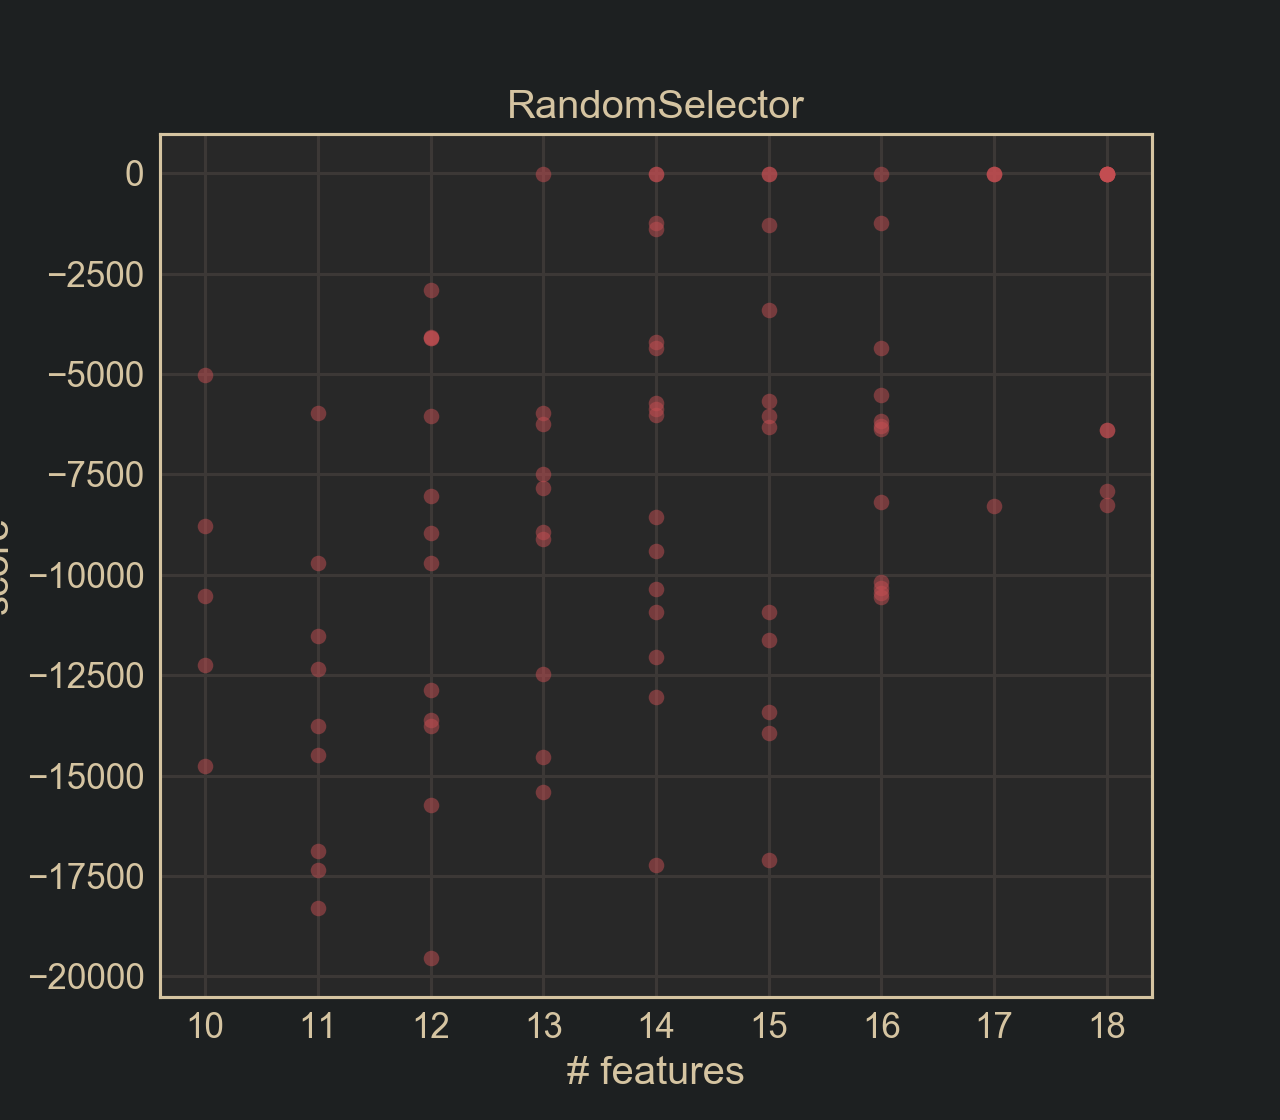

(<Figure size 640x560 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13ec148d0>)

In [23]:
%matplotlib notebook

selector.plot_subset(marker='o', alpha=0.5, color='r')

## Exhaustive Selector

In [24]:
features = X_train.columns[:10]

selector = ExhaustiveSelector(model, cv, scoring, n_jobs=-1, min_features=1, max_features=3)
selector.fit(X_train[features], y_train)

[01:03:10] ITER: 1/175      SUBSET: 1/10      SCORE: -15423.4606 ± 2487.3005      ETA: 19 sec
[01:03:10] ITER: 2/175      SUBSET: 1/10      SCORE: -11966.5937 ± 3856.4568      ETA: 18 sec
[01:03:10] ITER: 3/175      SUBSET: 1/10      SCORE: -17221.5335 ± 2437.5846      ETA: 18 sec
[01:03:11] ITER: 4/175      SUBSET: 1/10      SCORE: -17927.9456 ± 2640.4561      ETA: 18 sec
[01:03:11] ITER: 5/175      SUBSET: 1/10      SCORE: -17802.6724 ± 2678.0470      ETA: 18 sec
[01:03:11] ITER: 6/175      SUBSET: 1/10      SCORE: -14085.8542 ± 3898.4301      ETA: 18 sec
[01:03:11] ITER: 7/175      SUBSET: 1/10      SCORE: -17919.1728 ± 1842.0015      ETA: 18 sec
[01:03:11] ITER: 8/175      SUBSET: 1/10      SCORE: -18236.0320 ± 2644.1336      ETA: 18 sec
[01:03:11] ITER: 9/175      SUBSET: 1/10      SCORE: -18105.5768 ± 2552.8666      ETA: 18 sec
[01:03:11] ITER: 10/175      SUBSET: 1/10      SCORE: -18486.1272 ± 3048.4337      ETA: 18 sec
[01:03:11] ITER: 11/175      SUBSET: 2/10      SCORE: -8975

[01:03:21] ITER: 87/175      SUBSET: 3/10      SCORE: -15617.3736 ± 2601.8422      ETA: 9 sec
[01:03:21] ITER: 88/175      SUBSET: 3/10      SCORE: -16052.1637 ± 3076.4265      ETA: 9 sec
[01:03:21] ITER: 89/175      SUBSET: 3/10      SCORE: -15997.1763 ± 907.0233      ETA: 9 sec
[01:03:21] ITER: 90/175      SUBSET: 3/10      SCORE: -16846.2779 ± 1012.3168      ETA: 9 sec
[01:03:21] ITER: 91/175      SUBSET: 3/10      SCORE: -16197.3860 ± 1417.7656      ETA: 9 sec
[01:03:21] ITER: 92/175      SUBSET: 3/10      SCORE: -12378.9776 ± 3975.7184      ETA: 9 sec
[01:03:21] ITER: 93/175      SUBSET: 3/10      SCORE: -11981.6937 ± 4019.0928      ETA: 8 sec
[01:03:21] ITER: 94/175      SUBSET: 3/10      SCORE: -8026.6952 ± 1460.8750      ETA: 8 sec
[01:03:22] ITER: 95/175      SUBSET: 3/10      SCORE: -12308.7500 ± 3873.6749      ETA: 8 sec
[01:03:22] ITER: 96/175      SUBSET: 3/10      SCORE: -12447.5083 ± 4233.5398      ETA: 8 sec
[01:03:22] ITER: 97/175      SUBSET: 3/10      SCORE: -12940.2

[01:03:31] ITER: 175/175      SUBSET: 3/10      SCORE: -19392.0892 ± 3438.2413      ETA: 0 ms
Iterations limit exceed!


ExhaustiveSelector(cv=5,
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   max_features=3, min_features=1, n_digits=4, n_jobs=-1,
                   scoring='neg_mean_squared_error', verbose=1)

In [25]:
subset = selector.get_subset()

_, y_pred = crossval_predict(model, cv, X_train[subset], y_train, 
                             X_new=X_test[subset], scoring=scoring, 
                             verbose=2, n_jobs=None)

get_score(y_test, y_pred)

[01:03:31]  Ridge

[01:03:31]  VAL 1:   -5054.7596
[01:03:31]  VAL 2:   -4803.8742
[01:03:31]  VAL 3:   -5964.0104
[01:03:31]  VAL 4:   -4944.8627
[01:03:31]  VAL 5:   -3642.3704

[01:03:32]  VALID:   -4881.9755 ± 741.2596



-3565.206942856599

<IPython.core.display.Javascript object>


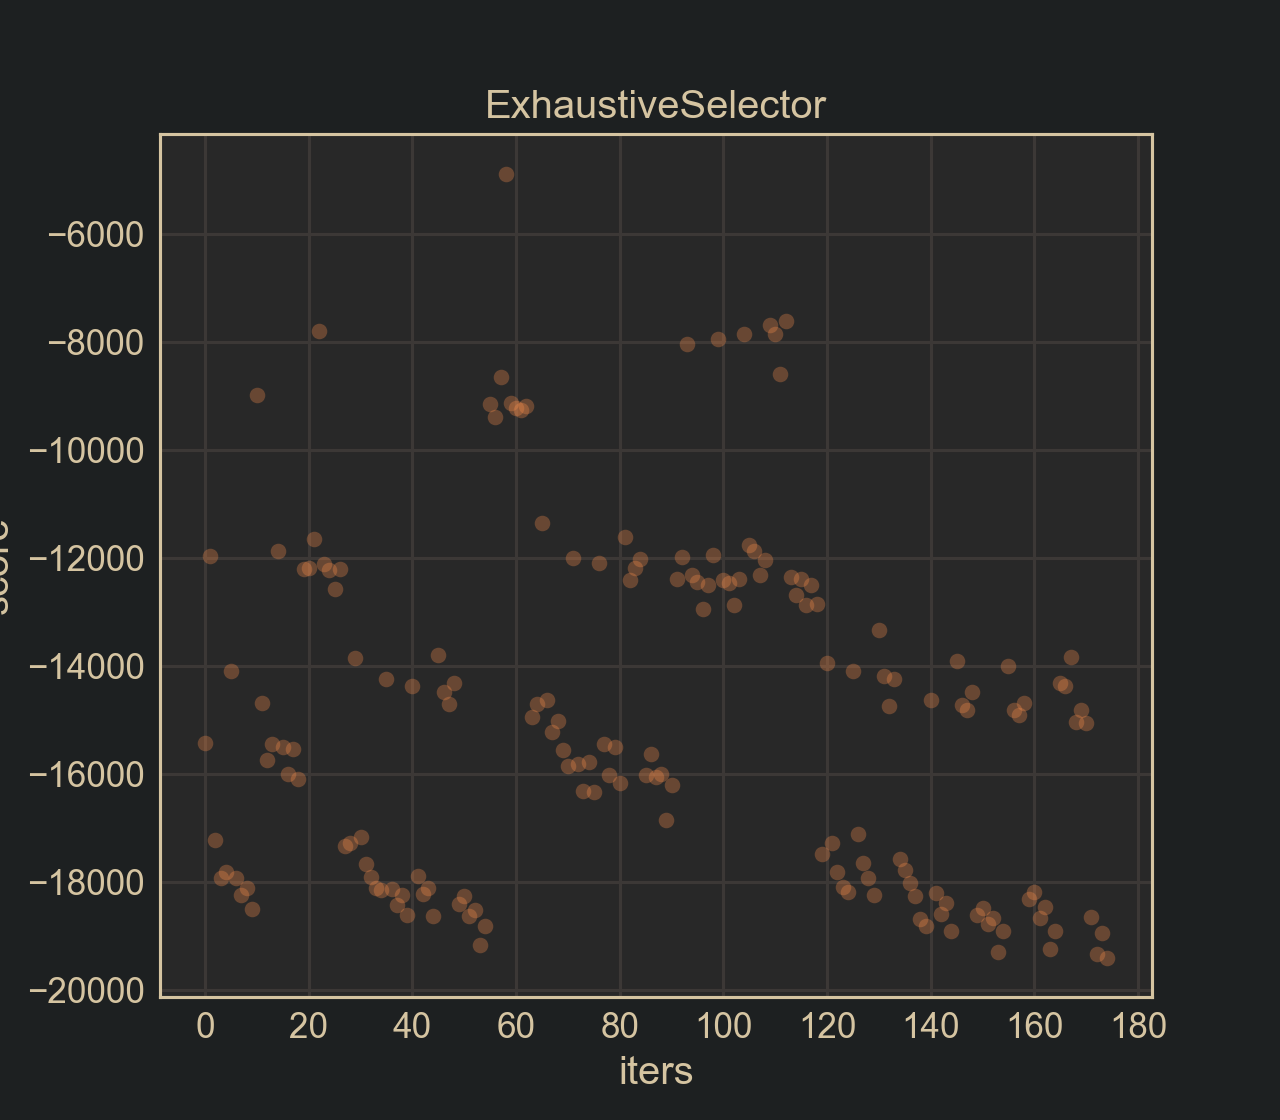

(<Figure size 640x560 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13ea90fd0>)

In [26]:
%matplotlib notebook

selector.plot_progress(marker='o', alpha=0.3, color='y')